<a href="https://colab.research.google.com/github/GoAshim/EDA/blob/main/EDA_1_NBA_Player_Stats_for_Entire_Career.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform EDA on the entire career statistics of all NBA Players played in 2021-22 season.
In this Exploratory Data Analysis (EDA) exercise we will work on the dataframe we created during previous web scraping assignment (link [here](https://github.com/GoAshim/WebScraping/blob/27939865ea33f8c5c1d43bd1941662de9908b8a3/Web_Scraping_3_NBA_Player_Stats_for_Entire_Career.ipynb)). We will analyze the dataframe and extract important information / statistics of the entire career of the players who played in NBA 2021-22 season.

## Step 1 - Import required libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

## Step 2 - Extract and prepare the dataset   

### Step 2.1 - Extract the content of the CSV data file and load to a dataframe

In [2]:
# Location of the CSV file in my Google Drive
url = "/content/drive/MyDrive/DataFiles/NBAPlayerStat.csv"

df1 = pd.read_csv(url)

df1.head()

,Unnamed: 0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33
0,0,1,Precious Achiuwa,Regular,2020-21,21,MIA,NBA,PF,61,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,1,1,Precious Achiuwa,Regular,2021-22,22,TOR,NBA,C,73,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
2,2,1,Precious Achiuwa,Playoff,2020-21,21,MIA,NBA,PF,3,...,0.250,0.0,2.0,2.0,0.0,0.0,0.7,1.3,0.3,2.3
3,3,1,Precious Achiuwa,Playoff,2021-22,22,TOR,NBA,C,6,...,0.600,1.3,3.5,4.8,1.0,0.2,0.8,1.5,2.3,10.2
4,0,2,Steven Adams,Regular,2013-14,20,OKC,NBA,C,81,...,0.581,1.8,2.3,4.1,0.5,0.5,0.7,0.9,2.5,3.3


### Step 2.2 - Remove the first column from the dataframe as that isn't necessary

In [3]:
# We see that the index of the dataframe was extracted to the CSV file. Let's remove that column as we won't need that for our analysis

df1.drop(columns = ['Unnamed: 0'], inplace = True)
df1.columns

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21',
       'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31',
       'C32', 'C33'],
      dtype='object')

### Step 2.3 - Rename columns of the dataframe.

In [4]:
# We see that the column names C1 to C33 are not meaningful, so let's change those column names as they are described in the Basketball-reference site

# First create a dictionary with the old and the corresponding new column names
col_dict = {
    'C1' : 'player_id', 
    'C2' : 'player_name', 
    'C3' : 'season_type', 
    'C4' : 'season', 
    'C5' : 'age', 
    'C6' : 'team', 
    'C7' : 'league', 
    'C8' : 'position', 
    'C9' : 'games_played', 
    'C10' : 'games_started', 
    'C11' : 'minutes_per_game',
    'C12' : 'field_goals_per_game', 
    'C13' : 'field_goals_attempts_per_game', 
    'C14' : 'field_goal_percentage', 
    'C15' : '3points_per_game', 
    'C16' : '3points_attempts_per_game', 
    'C17' : '3points_percentage', 
    'C18' : '2points_per_game', 
    'C19' : '2points_attempts_per_game', 
    'C20' : '2points_percentage', 
    'C21' : 'effective_field_goal_percentage',
    'C22' : 'free_throw_per_game', 
    'C23' : 'free_throw_attempts_per_game', 
    'C24' : 'free_throw_percentage', 
    'C25' : 'offensive_rebound_per_game', 
    'C26' : 'defensive_rebound_per_game', 
    'C27' : 'total_rebound_per_game', 
    'C28' : 'assists_per_game', 
    'C29' : 'steals_per_game', 
    'C30' : 'blocks_per_game', 
    'C31' : 'turnover_per_game',
    'C32' : 'foul_per_game', 
    'C33' : 'points_per_game'
}

df1.rename(columns = col_dict, inplace = True)

df1.columns

Index(['player_id', 'player_name', 'season_type', 'season', 'age', 'team',
       'league', 'position', 'games_played', 'games_started',
       'minutes_per_game', 'field_goals_per_game',
       'field_goals_attempts_per_game', 'field_goal_percentage',
       '3points_per_game', '3points_attempts_per_game', '3points_percentage',
       '2points_per_game', '2points_attempts_per_game', '2points_percentage',
       'effective_field_goal_percentage', 'free_throw_per_game',
       'free_throw_attempts_per_game', 'free_throw_percentage',
       'offensive_rebound_per_game', 'defensive_rebound_per_game',
       'total_rebound_per_game', 'assists_per_game', 'steals_per_game',
       'blocks_per_game', 'turnover_per_game', 'foul_per_game',
       'points_per_game'],
      dtype='object')

### Step 2.4 - Remove all derived columns from the dataframe.

In [5]:
# We are going to remove the following derived columns, as we already have their underlying data
# 'field_goals_per_game', 'field_goals_attempts_per_game', 'field_goal_percentage', '3points_percentage', '2points_percentage', 
# 'free_throw_percentage', 'total_rebound_per_game'

# Method 1
drop_cols = [11, 12, 13, 16, 19, 20, 23, 26]
df1.drop(df1.columns[drop_cols], axis= 1, inplace= True)
df1.columns

# Method 2
#drop_cols = ['field_goals_per_game', 'field_goals_attempts_per_game', 'field_goal_percentage', '3points_percentage', '2points_percentage', 'effective_field_goal_percentage', 'free_throw_percentage', 'total_rebound_per_game']
#df1.drop(columns= drop_cols, inplace= True)
#df1.columns

# I prefer menthod 1 above because using the column index is easier than to use the column names, which can be long

Index(['player_id', 'player_name', 'season_type', 'season', 'age', 'team',
       'league', 'position', 'games_played', 'games_started',
       'minutes_per_game', '3points_per_game', '3points_attempts_per_game',
       '2points_per_game', '2points_attempts_per_game', 'free_throw_per_game',
       'free_throw_attempts_per_game', 'offensive_rebound_per_game',
       'defensive_rebound_per_game', 'assists_per_game', 'steals_per_game',
       'blocks_per_game', 'turnover_per_game', 'foul_per_game',
       'points_per_game'],
      dtype='object')

### Step 2.5 - Create new columns to the dataframe to calculate statics per season based on the per game statistics.

In [6]:
# We call df1.info() to check if the existing columns of the dataframe we need to use for the calculation have the right datatype

df1['minutes'] = df1['minutes_per_game'] * df1['games_played']
df1['3points'] = df1['3points_per_game'] * df1['games_played']
df1['3points_attempts'] = df1['3points_attempts_per_game'] * df1['games_played']
df1['2points'] = df1['2points_per_game'] * df1['games_played']
df1['2points_attempts'] = df1['2points_attempts_per_game'] * df1['games_played']
df1['free_throws'] = df1['free_throw_per_game'] * df1['games_played']
df1['free_throw_attempts'] = df1['free_throw_attempts_per_game'] * df1['games_played']
df1['offensive_rebound'] = df1['offensive_rebound_per_game'] * df1['games_played']
df1['defensive_rebound'] = df1['defensive_rebound_per_game'] * df1['games_played']
df1['assists'] = df1['assists_per_game'] * df1['games_played']
df1['steals'] = df1['steals_per_game'] * df1['games_played']
df1['blocks'] = df1['blocks_per_game'] * df1['games_played']
df1['turnovers'] = df1['turnover_per_game'] * df1['games_played']
df1['fouls'] = df1['foul_per_game'] * df1['games_played']
df1['points'] = df1['points_per_game'] * df1['games_played']

df1.columns

Index(['player_id', 'player_name', 'season_type', 'season', 'age', 'team',
       'league', 'position', 'games_played', 'games_started',
       'minutes_per_game', '3points_per_game', '3points_attempts_per_game',
       '2points_per_game', '2points_attempts_per_game', 'free_throw_per_game',
       'free_throw_attempts_per_game', 'offensive_rebound_per_game',
       'defensive_rebound_per_game', 'assists_per_game', 'steals_per_game',
       'blocks_per_game', 'turnover_per_game', 'foul_per_game',
       'points_per_game', 'minutes', '3points', '3points_attempts', '2points',
       '2points_attempts', 'free_throws', 'free_throw_attempts',
       'offensive_rebound', 'defensive_rebound', 'assists', 'steals', 'blocks',
       'turnovers', 'fouls', 'points'],
      dtype='object')

### Step 2.6 - Remove all columns containing per game statistics.

In [7]:
# We use the method 1 we used earlier, here to drop from 10th column all the way upto the 25th column
 
df1.drop(df1.columns[10:25], axis= 1, inplace= True)
df1.columns

Index(['player_id', 'player_name', 'season_type', 'season', 'age', 'team',
       'league', 'position', 'games_played', 'games_started', 'minutes',
       '3points', '3points_attempts', '2points', '2points_attempts',
       'free_throws', 'free_throw_attempts', 'offensive_rebound',
       'defensive_rebound', 'assists', 'steals', 'blocks', 'turnovers',
       'fouls', 'points'],
      dtype='object')

### Step 2.7 - Find if there are duplicate rows in the dataframe and then delete those records.

In [8]:
df1.shape # This shows the dataframe has 7637 rows and 25 columns

# Find how many duplicate rows
df1.duplicated().sum() # This shows the dataframe has 2510 duplicate rows

# Remove duplicate rows from the dataframe
df1.drop_duplicates(inplace=True)

df1.shape # This shows the dataframe has 5127 rows and 25 columns

(5127, 25)

### Step 2.8 - C:heck how many records have null value in which columns

In [9]:
df1.info() # This shows that none of the 5127 records has any null / NaN values in any column, which is good

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5127 entries, 0 to 7636
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            5127 non-null   int64  
 1   player_name          5127 non-null   object 
 2   season_type          5127 non-null   object 
 3   season               5127 non-null   object 
 4   age                  5127 non-null   int64  
 5   team                 5127 non-null   object 
 6   league               5127 non-null   object 
 7   position             5127 non-null   object 
 8   games_played         5127 non-null   int64  
 9   games_started        5127 non-null   int64  
 10  minutes              5127 non-null   float64
 11  3points              5127 non-null   float64
 12  3points_attempts     5127 non-null   float64
 13  2points              5127 non-null   float64
 14  2points_attempts     5127 non-null   float64
 15  free_throws          5127 non-null   f

### Step 2.9 - Check the first few rows of the dataframe

In [10]:
df1.head(10)

,player_id,player_name,season_type,season,age,team,league,position,games_played,games_started,...,free_throws,free_throw_attempts,offensive_rebound,defensive_rebound,assists,steals,blocks,turnovers,fouls,points
0,1,Precious Achiuwa,Regular,2020-21,21,MIA,NBA,PF,61,4,...,54.9,109.8,73.2,134.2,30.5,18.3,30.5,42.7,91.5,305.0
1,1,Precious Achiuwa,Regular,2021-22,22,TOR,NBA,C,73,28,...,80.3,131.4,146.0,328.5,80.3,36.5,43.8,87.6,153.3,664.3
2,1,Precious Achiuwa,Playoff,2020-21,21,MIA,NBA,PF,3,0,...,0.9,3.9,0.0,6.0,0.0,0.0,2.1,3.9,0.9,6.9
3,1,Precious Achiuwa,Playoff,2021-22,22,TOR,NBA,C,6,1,...,6.0,10.2,7.8,21.0,6.0,1.2,4.8,9.0,13.8,61.2
4,2,Steven Adams,Regular,2013-14,20,OKC,NBA,C,81,20,...,81.0,137.7,145.8,186.3,40.5,40.5,56.7,72.9,202.5,267.3
5,2,Steven Adams,Regular,2014-15,21,OKC,NBA,C,70,67,...,105.0,203.0,196.0,322.0,63.0,35.0,84.0,98.0,224.0,539.0
6,2,Steven Adams,Regular,2015-16,22,OKC,NBA,C,80,80,...,112.0,200.0,216.0,312.0,64.0,40.0,88.0,88.0,224.0,640.0
7,2,Steven Adams,Regular,2016-17,23,OKC,NBA,C,80,80,...,160.0,256.0,280.0,336.0,88.0,88.0,80.0,144.0,192.0,904.0
8,2,Steven Adams,Regular,2017-18,24,OKC,NBA,C,76,76,...,159.6,288.8,387.6,304.0,91.2,91.2,76.0,129.2,212.8,1056.4
9,2,Steven Adams,Regular,2018-19,25,OKC,NBA,C,80,80,...,144.0,296.0,392.0,368.0,128.0,120.0,80.0,136.0,208.0,1112.0


## Step 3 - Perform Exploratory Data Analysis (EDA)

### 3.1 - How many players played in the 2020-21 season

In [11]:
# First extract a subset of dataframe with only records for 2020-21 season and then get the unique value of player id

df1[df1['season'] == '2020-21']['player_id'].nunique()

450

### 3.2 - Show every teams played in the 2021-22 season and how many players played for each team 

In [12]:
df1[df1['season'] == '2021-22'].groupby('team').agg({'player_id' : 'count'}).reset_index()

,team,player_id
0,ATL,38
1,BOS,43
2,BRK,36
3,CHI,34
4,CHO,19
5,CLE,26
6,DAL,41
7,DEN,35
8,DET,27
9,GSW,31


### 3.3 From the above line of code we see 31 teams played in the 2021-22 season, however we know that only 30 teams played, so there must be something wrong. Upon further checking we see that the team TOT has unusually high number of players played. So we checked the data and found out if a player played for multiple teams in a season then the TOT line has the summed up values for the entire season. As we have the individual record of each season we can safely remove all records for TOT.

In [13]:
df2 = df1[df1['team'] != 'TOT']
df2.shape

(4781, 25)

### 3.4 - Show every teams played in the 2021-22 season, what was the total points each team scored and how many players played for each team 

In [14]:
df2[df2['season'] == '2021-22'].groupby('team').agg({'player_id' : 'count', 'points' : 'sum'}).reset_index()

,team,player_id,points
0,ATL,38,9839.8
1,BOS,43,11700.0
2,BRK,36,9694.3
3,CHI,34,9632.0
4,CHO,19,9464.4
5,CLE,26,8844.7
6,DAL,41,10774.9
7,DEN,35,9794.2
8,DET,27,8599.8
9,GSW,31,11574.9


In [ ]:
# Get the same result as above but now sorted by the total points scored by each team

df2[df2['season'] == '2021-22'].groupby('team').agg({'player_id' : 'count', 'points' : 'sum'}).reset_index().sort_values(['points'], ascending=False)

,team,player_id,points
1,BOS,43,11700.0
9,GSW,31,11574.9
15,MIA,36,10901.6
14,MEM,36,10824.3
23,PHO,37,10816.7
6,DAL,41,10774.9
16,MIL,43,10711.0
22,PHI,38,10270.1
17,MIN,31,10168.8
28,UTA,36,9914.5


### 3.5 - Create a bar chart showing total points scored by each team in 2021-22 season.

In [77]:
# Prepare the data for visualization

df03 = df2[df2['season'] == '2021-22'].groupby('team').agg({'points' : 'sum'}).reset_index().sort_values(['points'])
df03['points'] = round(df03['points'], 0)
df03.reset_index(drop=True, inplace=True)
df03 = df03.astype({'points':int})
df03.head()

,team,points
0,OKC,8511
1,ORL,8543
2,DET,8600
3,POR,8712
4,NYK,8737


<BarContainer object of 30 artists>

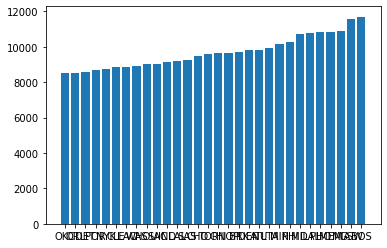

In [78]:
plt.bar(df03['team'], df03['points'])

<BarContainer object of 30 artists>

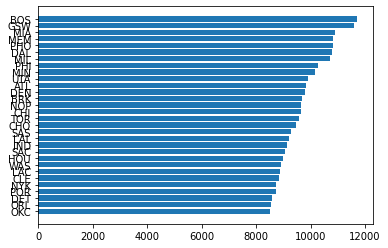

In [79]:
plt.barh(df03['team'], df03['points'])

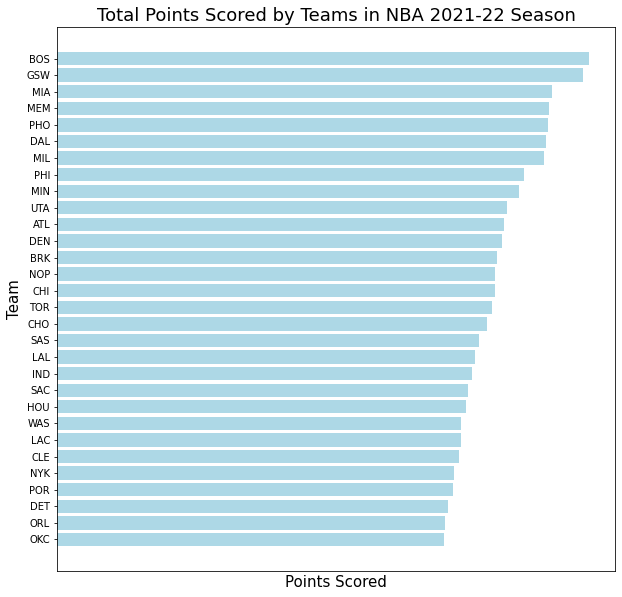

In [80]:
# So from the above 2 bar graphs, we can see that the horizontal bar graph is better, however we need to increase the graph size and 
# some more customization to improve the readability of the graph 

plt.figure(figsize=(10, 10))
plt.barh(df03['team'], df03['points'], color='lightblue')
plt.xlabel('Points Scored', fontsize = 15)
plt.xticks([]) # This will remove the scale on the x axis
plt.ylabel('Team', fontsize = 15)
plt.title('Total Points Scored by Teams in NBA 2021-22 Season', fontsize = 18)
plt.show()

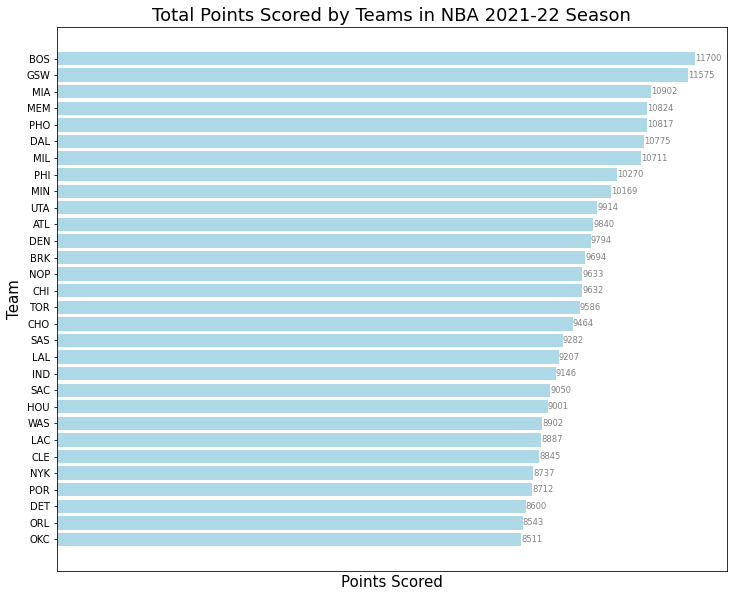

In [81]:
# Add label on each bar showing the points scored by each team

plt.figure(figsize=(12, 10))
plt.barh(df03['team'], df03['points'], color='lightblue')
plt.xlabel('Points Scored', fontsize = 15)
plt.xticks([]) # This will remove the scale on the x axis
plt.ylabel('Team', fontsize = 15)
plt.title('Total Points Scored by Teams in NBA 2021-22 Season', fontsize = 18)

for i in range(len(df03.index)):
  plt.text(df03['points'][i], i, df03['points'][i], va='center', fontsize='small', color='gray')

plt.show()

In [68]:
len(df03.index)

30